In [1]:
#!pip install matplotlib
#!pip install numpy
#!pip install scikit-learn
#!pip install ipywidgets

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
%matplotlib inline

# Teil 10: (Linear-) Regression & Regularization

Alexander Schulz

### Helping functions

In [3]:
np.random.seed(9)
noise = np.random.normal(size=8)
rand_x = np.random.uniform(low=0.5, high=4, size=8)
w_slider = widgets.FloatSlider(min=-2, max=2, step=0.1, value=1)
b_slider = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0)

def plot_points_and_line(w, b):
    rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
          "xtick.major.size" : 5, "ytick.major.size" : 5,}
    with plt.rc_context(rc):
        f, ax = plt.subplots(1, 1, figsize=(6,6))
        x = rand_x
        y = 0.8*x+0.5 + noise
        ax.scatter(x, y)
        line_x = np.array([0,5])
        line_y = w*line_x+b
        ax.plot(line_x, line_y,'k-')
        ax.set_aspect(1)
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_xlim((0,5))
        ax.set_ylim((0,5))
        ax.annotate('$x$', xy=(5, -.5))
        ax.annotate('$y$', xy=(.2, 5))

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
def plot_points_and_line_and_error(w, b):
    rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
          "xtick.major.size" : 5, "ytick.major.size" : 5,}
    with plt.rc_context(rc):
        f, ax = plt.subplots(1, 1, figsize=(6,6))
        x = rand_x
        y = 0.8*x+0.5 + noise
        for x_, y_ in zip(x,y):
            ax.plot([x_, x_], [y_, w*x_+b], 'r--')
        ax.scatter(x, y)
        line_x = np.array([0,5])
        line_y = w*line_x+b
        ax.plot(line_x, line_y,'k-')
        ax.set_aspect(1)
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_xlim((0,5))
        ax.set_ylim((0,5))
        ax.annotate('$x$', xy=(5, -.5))
        ax.annotate('$y$', xy=(.2, 5))

        # make arrows
        ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax.get_xaxis_transform(), clip_on=False)
        
def plot_points_and_line_and_sserror(w, b):
    rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
          "xtick.major.size" : 5, "ytick.major.size" : 5,}
    with plt.rc_context(rc):
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)
        x = rand_x
        y = 0.8*x+0.5 + noise
        SS = 0.
        for x_, y_ in zip(x,y): 
            y_pred = w*x_+b
            SS += (y_ - y_pred)**2
            ax1.plot([x_, x_], [y_, y_pred], 'r--')
        ax1.scatter(x, y)
        line_x = np.array([0,5])
        line_y = w*line_x+b
        ax1.plot(line_x, line_y,'k-')
        ax1.set_aspect(1)
        ax1.spines['left'].set_position('zero')
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_position('zero')
        ax1.spines['top'].set_visible(False)
        ax1.xaxis.set_ticks_position('bottom')
        ax1.yaxis.set_ticks_position('left')
        ax1.set_xlim((0,5))
        ax1.set_ylim((0,5))
        ax1.annotate('$x$', xy=(5, -.5))
        ax1.annotate('$y$', xy=(.2, 5))

        # make arrows
        ax1.plot((1), (0), ls="", marker=">", ms=10, color="k",
                transform=ax1.get_yaxis_transform(), clip_on=False)
        ax1.plot((0), (1), ls="", marker="^", ms=10, color="k",
                transform=ax1.get_xaxis_transform(), clip_on=False)
        
        ax2.add_patch(Rectangle((0, 0), np.sqrt(SS), np.sqrt(SS), color='red'))
        ax2.annotate(f'$\epsilon={SS:.2f}$', xy=(np.sqrt(SS)/2, np.sqrt(SS)/2), ha='center')
        ax2.set_xlim((0,5))
        ax2.set_ylim((0,5))
        ax2.set_title('Sum of Squared Errors')

## Fitting a 2D Line to n points

In [4]:
interact(plot_points_and_line, w=w_slider, b=b_slider);

interactive(children=(FloatSlider(value=1.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Fitting a 2D Line to n points

In [5]:
interact(plot_points_and_line_and_error, w=w_slider, b=b_slider);

interactive(children=(FloatSlider(value=1.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Fitting a 2D Line to n points

* Sum of Squared Errors: $\epsilon = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

In [6]:
interact(plot_points_and_line_and_sserror, w=w_slider, b=b_slider);

interactive(children=(FloatSlider(value=1.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Linear Regression in scikit-learn

### Generate some toy data

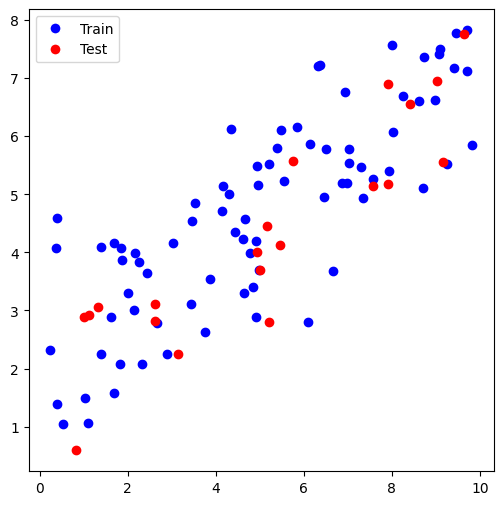

In [7]:
X = np.random.uniform(low=0, high=10, size=(100, 1))
y = 0.5 * X + 2 + np.random.normal(size=(100,1))
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]


f, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_train, y_train, color='blue');
ax.scatter(X_test, y_test, color='red');
ax.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='blue', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Test', markerfacecolor='red', markersize=8)]);

### Fit Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training set
regr.fit(X_train, y_train)

# make predictions on the test set
predictions = regr.predict(X_test)

# calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2-Score: {r2:.2f}')

Mean Absolute Error: 0.76
Mean Squared Error: 0.86
R2-Score: 0.74


### Visualize

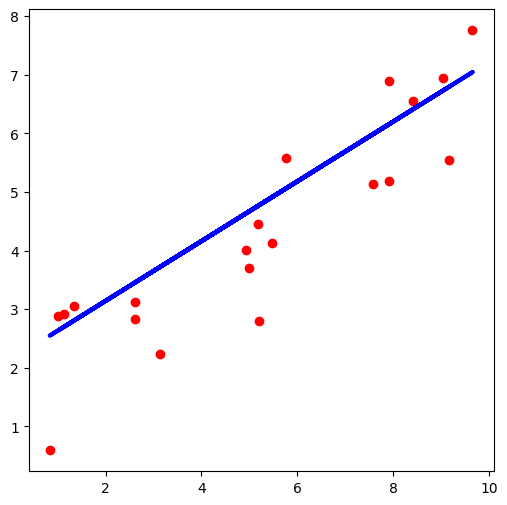

In [9]:
f, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_test, y_test, color='red');
ax.plot(X_test, predictions, color="blue", linewidth=3);

## KNN-Regression in scikit-learn

Mean Absolute Error: 0.70
Mean Squared Error: 0.78
R2-Score: 0.76


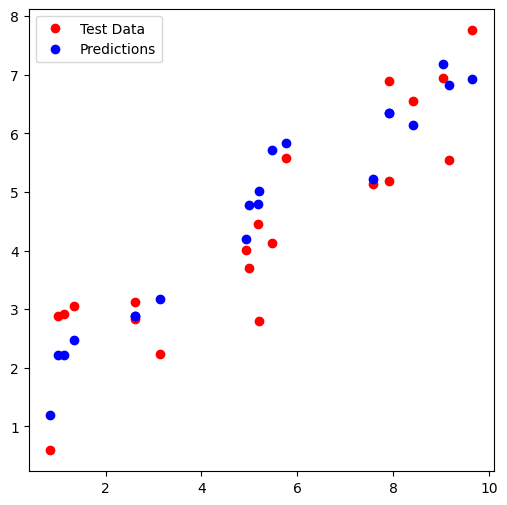

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Create linear regression object
regr = KNeighborsRegressor(n_neighbors=3)

# Train the model using the training set
regr.fit(X_train, y_train)

# make predictions on the test set
predictions = regr.predict(X_test)

# calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2-Score: {r2:.2f}')

f, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_test, y_test, color='red');
ax.scatter(X_test, predictions, color="blue");
ax.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Test Data', markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Predictions', markerfacecolor='blue', markersize=8)]);

## MLP Regression in scikit-learn

/home/carl/Lehre/BHT_Maschinelles_Lernen_WS2223/env310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/carl/Lehre/BHT_Maschinelles_Lernen_WS2223/env310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error: 4.91
Mean Squared Error: 27.42
R2-Score: -7.41


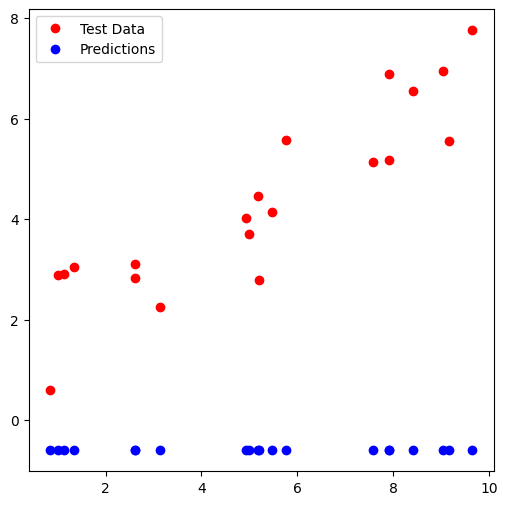

In [11]:
from sklearn.neural_network import MLPRegressor

# Create linear regression object
regr = MLPRegressor(hidden_layer_sizes=(5,2))

# Train the model using the training set
regr.fit(X_train, y_train)

# make predictions on the test set
predictions = regr.predict(X_test)

# calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2-Score: {r2:.2f}')

f, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_test, y_test, color='red');
ax.scatter(X_test, predictions, color="blue");
ax.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Test Data', markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Predictions', markerfacecolor='blue', markersize=8)]);

## Regularization

### Ridge Regression in scikit-learn

Mean Absolute Error: 1.13
Mean Squared Error: 1.92
R2-Score: 0.41


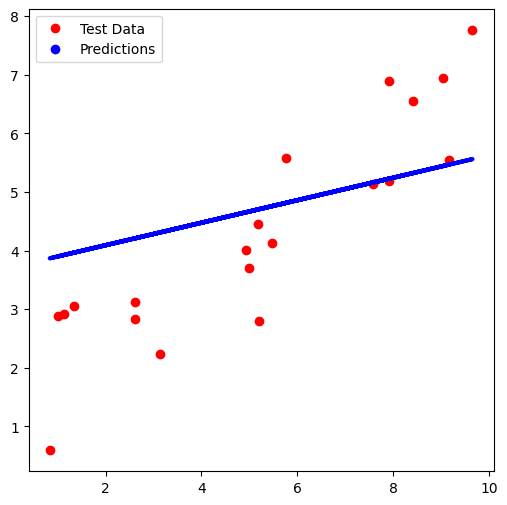

In [12]:
from sklearn.linear_model import Ridge

# Create linear regression object
regr = Ridge(alpha=1000.)

# Train the model using the training set
regr.fit(X_train, y_train)

# make predictions on the test set
predictions = regr.predict(X_test)

# calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2-Score: {r2:.2f}')

f, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(X_test, y_test, color='red');
ax.plot(X_test, predictions, color="blue", linewidth=3);
ax.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Test Data', markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Predictions', markerfacecolor='blue', markersize=8)]);

### Regularization with MLP (Classification) in scikit-learn

/home/carl/Lehre/BHT_Maschinelles_Lernen_WS2223/env310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


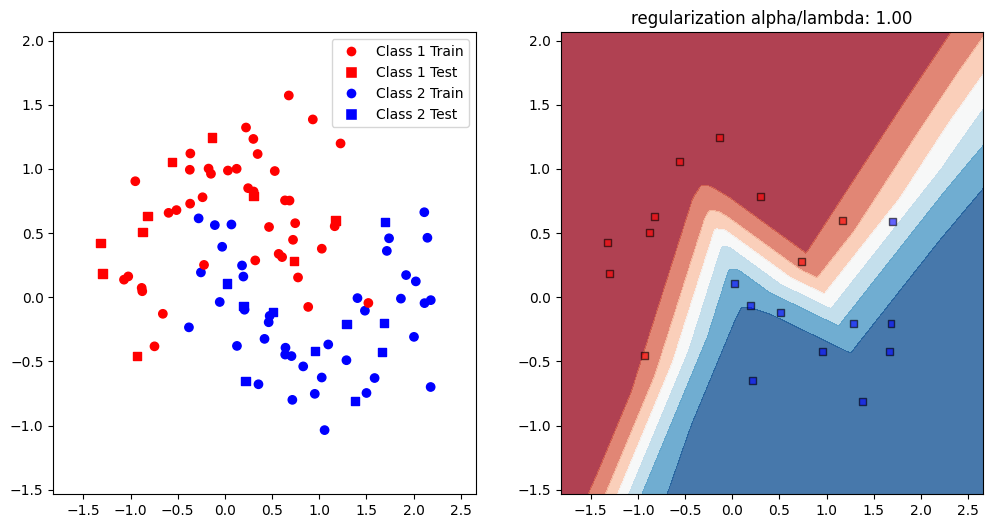

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_moons(100, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

alpha = 1.
# Create linear regression object
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(10,10),
        random_state=1,
        max_iter=1000,
        alpha=alpha,  # alpha controls the Regularization
    )), 
]) 

# Train the model using the training set
clf.fit(X_train, y_train)

# make predictions on the test set
predictions = clf.predict(X_test)


# plot the data set
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='s')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Class 1 Train', markerfacecolor='red', markersize=8),
                    Line2D([0], [0], marker='s', color='w', label='Class 1 Test', markerfacecolor='red', markersize=8),
                    Line2D([0], [0], marker='o', color='w', label='Class 2 Train', markerfacecolor='blue', markersize=8),
                    Line2D([0], [0], marker='s', color='w', label='Class 2 Test', markerfacecolor='blue', markersize=8)]);

# plot the predictions
Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
ax2.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    alpha=0.6,
    edgecolors="black",
    marker='s',
    s=25,
)
ax2.set_title(f'regularization alpha/lambda: {alpha:.2f}');